In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss

Data Preparation

In [18]:
trains = pd.read_excel('Trains.xlsx')

In [19]:
trains

,Линия,Количество поездов,Время проезда по линии
0,Сокольническая линия,76,67
1,Замоскворецкая линия,80,64
2,Арбатско-Покровская линия,80,63
3,Кольцевая линия,35,30
4,Калужско-Рижская линия,96,73
5,Таганско-Краснопресненская линия,85,64
6,Большая кольцевая линия,47,43
7,Серпуховско-Тимирязевская линия,90,61
8,Бутовская линия Лёгкого метро,24,16
9,Филёвская линия,27,23


In [20]:
pas = pd.read_excel('Passengers.xlsx')

C:\Users\Adrey\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [21]:
pas.head()

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en
0,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en
1,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1138975996,NaN,NaN,NaN,NaN,NaN,NaN
2,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1138975997,NaN,NaN,NaN,NaN,NaN,NaN
3,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1138975999,NaN,NaN,NaN,NaN,NaN,NaN
4,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1138976000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pas = pas.iloc[1:]

In [23]:
pas = pas[['NameOfStation', 'Line', 'Year', 'Quarter', 'IncomingPassengers',
       'OutgoingPassengers']]

In [24]:
pas[pas['NameOfStation'] == 'Митино']

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers
1,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031
182,Митино,Арбатско-Покровская линия,2021,II квартал,2119285,1991048
535,Митино,Арбатско-Покровская линия,2021,III квартал,2077107,1922906
804,Митино,Арбатско-Покровская линия,2021,IV квартал,2217044,2090460
1088,Митино,Арбатско-Покровская линия,2022,I квартал,2005840,1920776
1374,Митино,Арбатско-Покровская линия,2022,II квартал,2135762,2043853


In [25]:
pas = pas[pas['Year'] == '2021']

In [26]:
pas.head()

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers
1,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031
2,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309
3,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731
4,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208
5,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343


In [27]:
pas['IncomingPassengers'] = pas['IncomingPassengers'].astype(int)

In [28]:
pas = pas[['NameOfStation', 'Line', 'IncomingPassengers']].groupby(['Line', 'NameOfStation'], as_index = False).agg('mean')

In [29]:
pas.head()

,Line,NameOfStation,IncomingPassengers
0,Арбатско-Покровская линия,Арбатская,2312786.25
1,Арбатско-Покровская линия,Бауманская,4090732.75
2,Арбатско-Покровская линия,Волоколамская,1366349.50
3,Арбатско-Покровская линия,Измайловская,1497898.50
4,Арбатско-Покровская линия,Киевская,3780079.50


In [30]:
train_lines = [i for i in trains['Линия']]

In [31]:
train_lines

['Сокольническая линия',
 'Замоскворецкая линия',
 'Арбатско-Покровская линия',
 'Кольцевая линия',
 'Калужско-Рижская линия',
 'Таганско-Краснопресненская линия',
 'Большая кольцевая линия',
 'Серпуховско-Тимирязевская линия',
 'Бутовская линия Лёгкого метро',
 'Филёвская линия',
 'Калининская линия',
 'Люблинско-Дмитровская линия',
 'Солнцевская линия',
 'Некрасовская линия']

In [32]:
pas = pas[pas['Line'].apply(lambda x: x in train_lines)].reset_index().drop('index', axis = 1)

In [33]:
pas.head()

,Line,NameOfStation,IncomingPassengers
0,Арбатско-Покровская линия,Арбатская,2312786.25
1,Арбатско-Покровская линия,Бауманская,4090732.75
2,Арбатско-Покровская линия,Волоколамская,1366349.50
3,Арбатско-Покровская линия,Измайловская,1497898.50
4,Арбатско-Покровская линия,Киевская,3780079.50


In [34]:
pas.iloc[107]

Line                  Кольцевая линия
NameOfStation           Комсомольская
IncomingPassengers          7310336.0
Name: 107, dtype: object

Using data from [here](https://www.mk.ru/moscow/2020/03/11/nazvany-samye-zagruzhennye-stancii-moskovskogo-metro.html), get coeffitient:

In [35]:
coef = 27000 / pas.iloc[107]['IncomingPassengers']

In [36]:
pas['IncomingPassengers'] * coef

0       8542.046323
1      15108.715147
2       5046.476181
3       5532.339348
4      13961.348220
           ...     
244     1647.445993
245     4566.369179
246     1799.053628
247     5255.734107
248     2621.427148
Name: IncomingPassengers, Length: 249, dtype: float64

In [37]:
pas['IncomingPassengers'] = pas['IncomingPassengers'] * coef

In [38]:
pas.rename(columns = {'IncomingPassengers' : 'avg_pas_per_hour'}, inplace = True)

In [39]:
pas.head(20)

,Line,NameOfStation,avg_pas_per_hour
0,Арбатско-Покровская линия,Арбатская,8542.046323
1,Арбатско-Покровская линия,Бауманская,15108.715147
2,Арбатско-Покровская линия,Волоколамская,5046.476181
3,Арбатско-Покровская линия,Измайловская,5532.339348
4,Арбатско-Покровская линия,Киевская,13961.348220
5,Арбатско-Покровская линия,Крылатское,7508.210840
6,Арбатско-Покровская линия,Кунцевская,4624.440518
7,Арбатско-Покровская линия,Курская,5050.092020
8,Арбатско-Покровская линия,Митино,7688.675938
9,Арбатско-Покровская линия,Молодёжная,13538.463998


Poisson Process Parametrs Estimation

$E(N_t) = \lambda t \Rightarrow \lambda = E(N_1) =$ avg_pas_per_hour

In [40]:
import cvxpy as cp
from tqdm import tqdm
import cvxopt

In [41]:
#simulate a poisson arrival process for the station
def queue_simulation_poiss(line, station):
    l = float(pas[(np.array(pas['Line'] == line) * np.array(pas['NameOfStation'] == station))]['avg_pas_per_hour'])
    if l == 0:
        l = 100
    incoming_times = []
    time = 0
    while time < 1:
        time = time + ss.expon(scale = 1 / l).rvs()
        incoming_times.append(time)
    return np.array(incoming_times[:-1]) * 60

In [42]:
#simulate a uniform arrival process for station
def queue_simulation_unif(line, station):
    l = max(100, int(pas[(np.array(pas['Line'] == line) * np.array(pas['NameOfStation'] == station))]['avg_pas_per_hour']))
    incoming_times = np.linspace(0, 1, l) * 60
    return incoming_times[1:-1]

In [43]:
#create the list of stations on line
def stations_of_line(line):
    return list(pas[pas['Line'] == line]['NameOfStation'])
    

In [44]:
#get the time of the full cycle on line from table
def full_cycle_time(line):
    return 2 * int(trains[trains['Линия'] == line]['Время проезда по линии'])

In [45]:
lines = list(pas['Line'].unique())

In [46]:
all_trains = sum(trains['Количество поездов'])

In [47]:
all_trains

811

In [48]:
lines

['Арбатско-Покровская линия',
 'Большая кольцевая линия',
 'Бутовская линия Лёгкого метро',
 'Замоскворецкая линия',
 'Калининская линия',
 'Калужско-Рижская линия',
 'Кольцевая линия',
 'Люблинско-Дмитровская линия',
 'Некрасовская линия',
 'Серпуховско-Тимирязевская линия',
 'Сокольническая линия',
 'Солнцевская линия',
 'Таганско-Краснопресненская линия',
 'Филёвская линия']

In [49]:
cur_trains = [int(trains[trains['Линия'] == i]['Количество поездов']) for i in lines]

In [50]:
#find the distribution with difference in one train
def neighboring_distr(distr):
    ans = []
    ans.append(distr)
    for i in range(len(distr)):
        for j in range(len(distr)):
            if i != j:
                c = distr.copy()
                c[i], c[j] = c[i] - 1, c[j] + 1
                if c[i] >= 0:
                    ans.append(c)
    return ans


In [51]:
d = neighboring_distr(cur_trains)

In [52]:
#cvxpy estimation for avg waiting time
def cp_avg_wt(distr):
    c = {}
    cons = []
    num_pas = 0
    i = -1
    waiting_time = cp.sum([0])
    for line in lines:   
        i += 1
        interval = full_cycle_time(line) / distr[i]
        for station in stations_of_line(line):
            passengers = queue_simulation_unif(line, station)
            c[(line, station)] = cp.Variable(len(passengers), integer = True)
            cons.append(c[(line, station)] * interval - passengers >= 0)
            waiting_time += cp.sum(c[(line, station)] * interval - passengers)
            num_pas += len(passengers)



    obj = cp.Minimize(cp.sum(waiting_time) / num_pas)
    prob = cp.Problem(obj, cons)
    prob.solve()
    return prob.value

In [53]:
#numpy-only estimation for avg waiting time
def avg_wt(distr):
    cons = []
    num_pas = 0
    i = -1
    waiting_time = 0
    for line in lines:   
        i += 1
        interval = full_cycle_time(line) / distr[i]
        for station in stations_of_line(line):
            passengers = queue_simulation_unif(line, station)
            waiting_time += np.sum((1 + passengers // interval) * interval - passengers)
            num_pas += len(passengers)
    return waiting_time / num_pas

Numpy or cvxpy?

In [123]:
%time cp_avg_wt(d[0])

Wall time: 41.1 s


0.7862888957854544

In [124]:
%time avg_wt(d[0])

Wall time: 637 ms


0.7863928432547189

Obviously, numpy

In [54]:
#model with poisson process
def avg_wt_poiss(distr):
    cons = []
    num_pas = 0
    i = -1
    waiting_time = 0
    for line in tqdm(lines):   
        i += 1
        interval = full_cycle_time(line) / distr[i]
        for station in stations_of_line(line):
            passengers = queue_simulation_poiss(line, station)
            waiting_time += np.sum((1 + passengers // interval) * interval - passengers)
            num_pas += len(passengers)
    return waiting_time / num_pas

Poisson process or uniform distribution for the arrival process?

In [160]:
%time avg_wt_poiss(d[0])

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [46:58<00:00, 201.32s/it]

Wall time: 46min 58s


0.7862572813357225

Poisson process has almost the same effect but it's much longer.

In [55]:
#find best distribution from list
def bd(d):    
    best_res = 1000
    best_distr = d[0]
    for distr in tqdm(d):
        res = avg_wt(distr)
        if res < best_res:
            best_res = res
            best_distr = distr
    return (best_distr)

In [129]:
bd(d)

100%|████████████████████████████████████████████████████████████████████████████████| 183/183 [01:35<00:00,  1.92it/s]


[80, 46, 24, 81, 31, 96, 35, 83, 24, 90, 76, 33, 85, 27]

In [130]:
d[0]

[80, 47, 24, 80, 31, 96, 35, 83, 24, 90, 76, 33, 85, 27]

In [127]:
lines

['Арбатско-Покровская линия',
 'Большая кольцевая линия',
 'Бутовская линия Лёгкого метро',
 'Замоскворецкая линия',
 'Калининская линия',
 'Калужско-Рижская линия',
 'Кольцевая линия',
 'Люблинско-Дмитровская линия',
 'Некрасовская линия',
 'Серпуховско-Тимирязевская линия',
 'Сокольническая линия',
 'Солнцевская линия',
 'Таганско-Краснопресненская линия',
 'Филёвская линия']

So it suggests to move from Большая кольцевая линия to Замоскворецкая линия first of all. Let's create an algorithm to find the optimal distribution by improving the current distribution step by step.

In [135]:
cur_best = d[0]
sug_best = []
flag = 0
while flag == 0:
    sug_best = bd(neighboring_distr(cur_best))
    print(sug_best)
    if cur_best == sug_best:
        flag = 1
    cur_best = sug_best

  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 46, 24, 81, 31, 96, 35, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 46, 24, 81, 31, 95, 36, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 46, 23, 81, 31, 95, 37, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 46, 22, 81, 31, 95, 38, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 45, 22, 81, 31, 95, 39, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 44, 22, 81, 31, 95, 40, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 43, 22, 81, 31, 95, 41, 83, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 43, 22, 81, 31, 95, 42, 82, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 43, 21, 81, 31, 95, 43, 82, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 42, 21, 81, 31, 95, 44, 82, 24, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 41, 21, 81, 31, 95, 44, 82, 25, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 40, 21, 81, 32, 95, 44, 82, 25, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 39, 21, 81, 33, 95, 44, 82, 25, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 39, 20, 81, 33, 95, 45, 82, 25, 90, 76, 33, 85, 27]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 39, 20, 81, 33, 95, 46, 82, 25, 90, 76, 33, 85, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 38, 20, 81, 33, 95, 46, 82, 25, 90, 76, 33, 86, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 37, 20, 81, 33, 95, 46, 82, 25, 90, 76, 33, 87, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 20, 81, 33, 95, 46, 82, 25, 90, 76, 33, 88, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 20, 81, 33, 95, 46, 82, 25, 90, 76, 32, 89, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 19, 81, 33, 95, 46, 82, 25, 90, 76, 32, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 19, 81, 33, 95, 46, 82, 26, 90, 76, 31, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 18, 81, 33, 95, 47, 82, 26, 90, 76, 31, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 18, 81, 33, 95, 47, 82, 27, 90, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 17, 81, 33, 95, 48, 82, 27, 90, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 17, 81, 33, 95, 49, 81, 27, 90, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 36, 17, 81, 34, 95, 49, 80, 27, 90, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 35, 17, 81, 35, 95, 49, 80, 27, 90, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 34, 17, 81, 35, 95, 49, 80, 27, 91, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 33, 17, 81, 35, 95, 49, 80, 27, 92, 76, 30, 90, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 33, 17, 81, 35, 95, 49, 80, 27, 92, 76, 29, 91, 26]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 33, 17, 81, 35, 95, 49, 80, 27, 92, 76, 29, 92, 25]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 33, 17, 81, 35, 95, 49, 80, 27, 92, 76, 30, 92, 24]


  0%|                                                                                          | 0/183 [00:00<?, ?it/s]

[80, 33, 17, 81, 35, 95, 50, 80, 27, 92, 76, 30, 92, 23]


100%|████████████████████████████████████████████████████████████████████████████████| 183/183 [01:37<00:00,  1.88it/s]

[80, 33, 17, 81, 35, 95, 50, 80, 27, 92, 76, 30, 92, 23]


In [56]:
ideal_distr = [80, 33, 17, 81, 35, 95, 50, 80, 27, 92, 76, 30, 92, 23]

In [57]:
d[0]

[80, 47, 24, 80, 31, 96, 35, 83, 24, 90, 76, 33, 85, 27]

In [58]:
pred_data = pd.DataFrame.from_dict({'Lines' : lines, 'trains_on_lines' : ideal_distr})

In [59]:
pred_data

,Lines,trains_on_lines
0,Арбатско-Покровская линия,80
1,Большая кольцевая линия,33
2,Бутовская линия Лёгкого метро,17
3,Замоскворецкая линия,81
4,Калининская линия,35
5,Калужско-Рижская линия,95
6,Кольцевая линия,50
7,Люблинско-Дмитровская линия,80
8,Некрасовская линия,27
9,Серпуховско-Тимирязевская линия,92


In [60]:
diff_distr = np.array(ideal_distr) - np.array(d[0])

In [61]:
diff = pd.DataFrame.from_dict({'Lines' : lines, 'difference' : diff_distr})

In [62]:
diff

,Lines,difference
0,Арбатско-Покровская линия,0
1,Большая кольцевая линия,-14
2,Бутовская линия Лёгкого метро,-7
3,Замоскворецкая линия,1
4,Калининская линия,4
5,Калужско-Рижская линия,-1
6,Кольцевая линия,15
7,Люблинско-Дмитровская линия,-3
8,Некрасовская линия,3
9,Серпуховско-Тимирязевская линия,2


In [4]:
from matplotlib import pyplot as plt

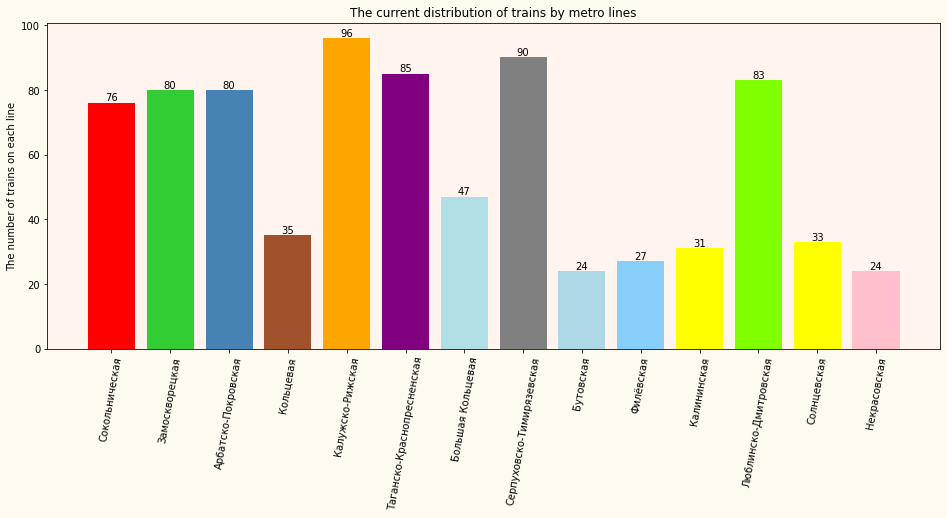

In [8]:
#Initially the distribution of trains looked like this:
lines = np.array(['Сокольническая', 'Замоскворецкая', 'Арбатско-Покровская', 'Кольцевая', 'Калужско-Рижская', 'Таганско-Краснопресненская', 'Большая Кольцевая', 'Серпуховско-Тимирязевская', 'Бутовская', 'Филёвская', 'Калининская', 'Люблинско-Дмитровская', 'Солнцевская', 'Некрасовская'])
colors = ['r', 'limegreen', 'steelblue', 'sienna', 'orange', 'purple', 'powderblue', 'grey', 'lightblue', 'lightskyblue', 'yellow', 'chartreuse', 'yellow', 'pink']
fig, ax = plt.subplots()

ax.bar(lines, trains['Количество поездов'], color = ['r', 'limegreen', 'steelblue', 'sienna', 'orange', 'purple', 'powderblue', 'grey', 'lightblue', 'lightskyblue', 'yellow', 'chartreuse', 'yellow', 'pink'])
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_title("The current distribution of trains by metro lines")
ax.set_ylabel("The number of trains on each line")
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=80)
plt.show()

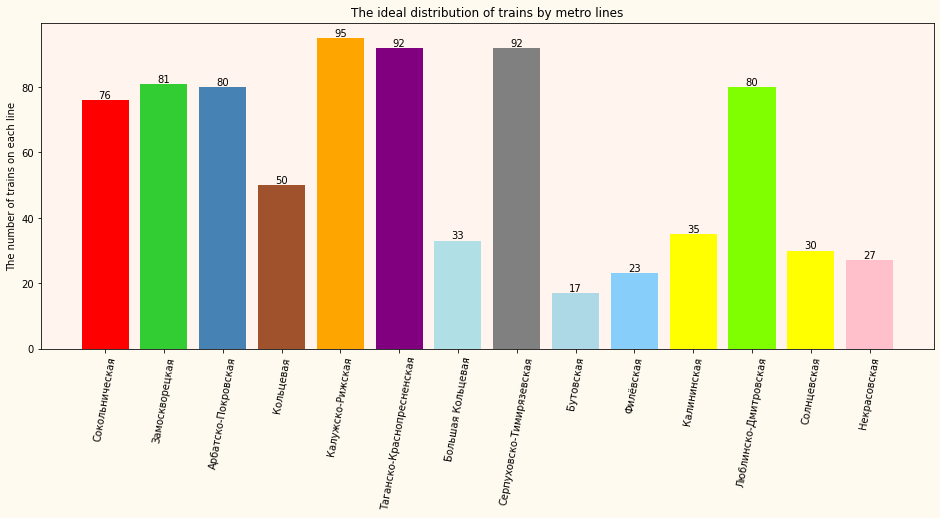

In [11]:
# The optimal distribution looks like this:
ideal_distr = np.array([76, 81, 80, 50, 95, 92, 33, 92, 17, 23, 35, 80, 30, 27])
fig, ax = plt.subplots()

ax.bar(lines, ideal_distr, color = ['r', 'limegreen', 'steelblue', 'sienna', 'orange', 'purple', 'powderblue', 'grey', 'lightblue', 'lightskyblue', 'yellow', 'chartreuse', 'yellow', 'pink'])
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_title("The ideal distribution of trains by metro lines")
ax.set_ylabel("The number of trains on each line")
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=80)
plt.show()

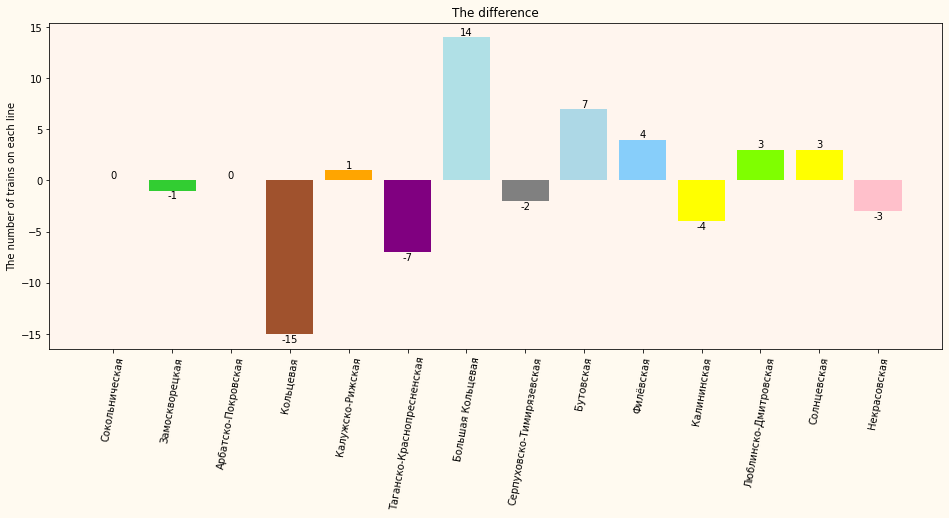

In [13]:
# The difference:
difference = trains['Количество поездов'] - ideal_distr
fig, ax = plt.subplots()

ax.bar(lines, difference, color = ['r', 'limegreen', 'steelblue', 'sienna', 'orange', 'purple', 'powderblue', 'grey', 'lightblue', 'lightskyblue', 'yellow', 'chartreuse', 'yellow', 'pink'])
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_title("The difference")
ax.set_ylabel("The number of trains on each line")
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=80)
plt.show()

In [12]:
pred_data.to_excel('predicted_trains.xlsx')

NameError: name 'diff' is not defined

In [63]:
diff.to_excel('difference_in_trains.xlsx')

,Lines,difference
0,Арбатско-Покровская линия,0
1,Большая кольцевая линия,-14
2,Бутовская линия Лёгкого метро,-7
3,Замоскворецкая линия,1
4,Калининская линия,4
5,Калужско-Рижская линия,-1
6,Кольцевая линия,15
7,Люблинско-Дмитровская линия,-3
8,Некрасовская линия,3
9,Серпуховско-Тимирязевская линия,2
